In [1]:
import torch
import cv2
import torchvision.transforms as transforms
from unprocess import *
from process import *
import matplotlib.pyplot as plt
# from PIL import Image
import numpy as np

GT Image

In [2]:
# Read the image and convert to RGB
image = cv2.imread("/home/sougato97/Thesis/datasets/LOLdataset/RAW_NoNoiseHigh/high/39.png")

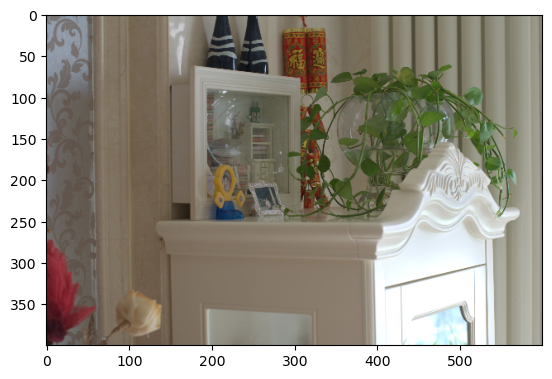

In [3]:
temp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(temp)

In [4]:
temp.shape

(400, 600, 3)

In [5]:
image.shape

(400, 600, 3)

Convert the image to a tensor

In [48]:
# Define the transform
transform = transforms.ToTensor()

In [49]:
# Convert the image to tensor
tensor = transform(image)

In [50]:
# Print the shape
print(image.shape)

(400, 600, 3)


Get the unprocesses image

In [51]:
un_image, metadata = unprocess(tensor)

In [52]:
un_image.shape

torch.Size([4, 200, 300])

Add noise to the image (using the code in unprocess.py)

In [53]:
shot_noise, read_noise = random_noise_levels()

In [54]:
noisy_img = add_noise(un_image, shot_noise, read_noise)

In [55]:
type(noisy_img)

torch.Tensor

In [56]:
noisy_img.shape

torch.Size([4, 200, 300])

In [57]:
metadata

{'cam2rgb': tensor([[ 1.6728, -0.5931, -0.0796],
         [-0.1802,  1.5024, -0.3221],
         [ 0.0274, -0.4296,  1.4022]]),
 'rgb_gain': tensor([1.2844]),
 'red_gain': tensor([2.0054]),
 'blue_gain': tensor([1.6811])}

In [58]:
bayer_image = apply_gains(noisy_img, metadata['red_gain'], metadata['blue_gain'])

In [59]:
bayer_image = torch.clamp(bayer_image, min=0.0, max=1.0)

In [60]:
shape = bayer_image.size()

In [61]:
bayer_image = bayer_image.view(1, shape[0], shape[1], shape[2])

In [62]:
image = demosaic(bayer_image)

In [63]:
image = image[0] # Again converting to 3D matrix

In [64]:
image = apply_ccm(image, metadata['cam2rgb'])

In [65]:
# Gamma compression.
image = torch.clamp(image, min=0.0, max=1.0)
image = gamma_compression(image)

In [66]:
image = image.cpu().numpy() # make sure tensor is on cpu
image = (image * 255).astype(np.uint8) # convert to uint8
image = np.transpose(image, (1, 2, 0)) # change the order of channels from CxHxW to HxWxC
# cv2.imwrite("image.png", tensor) # save the image

In [81]:
low_image = cv2.convertScaleAbs(image, alpha=1.0, beta=-70)

In [82]:
cv2.imwrite("low_image.png", low_image) # save the image

True

Add blind noise

In [4]:
# Define the transform
transform = transforms.ToTensor()

In [5]:
# Convert the image to tensor
tensor = transform(image)

from tensor to opencv

In [6]:
img = tensor.cpu().numpy() # make sure tensor is on cpu
img = (img * 255).astype(np.uint8) # convert to uint8
img = np.transpose(img, (1, 2, 0)) # change the order of channels from CxHxW to HxWxC

In [11]:
# Create a Gaussian noise array
noise = np.zeros(img.shape, np.uint8)
mean = 0
sigma = 100

In [12]:
noise = cv2.randn(noise, mean, sigma)

In [13]:
# Add the noise to the image
noisy_img = cv2.add(img, noise)

In [14]:
cv2.imwrite("gaussian_noise_image.png", noisy_img) # save the image

True

In [15]:
noisy_img.shape

(400, 600, 3)

In [16]:
Tensor = transform(noisy_img)

In [17]:
Tensor.shape

torch.Size([3, 400, 600])